In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
def load_json(filename):
    import json
    with open(
        filename,
        "r",
    ) as fp:
        dict_i = json.load(fp)  
    return dict_i

In [20]:
def abbreviateValue(value, abbreviations={}):
    for k, v in abbreviations.items():
        if k in value:
            
            value = value.replace(k, v)
    #TODO
    if value[0:2] not in ["q_", "u_"]:
        value = value.replace("_", " ")
    return value
    
def abbreviate_dict_value(input_dict, abbreviations):
    
    conv ={}
    for k1, dict_i in input_dict.items():
        conv[k1] = { abbreviateValue(k, abbreviations): d for k, d in dict_i.items()}
    return conv

In [21]:
name_folder_output = "output_v2"

In [22]:
compute_results = False

In [23]:
if compute_results:
    from experiments_compas_trees import run_compas_experiments_trees

    run_compas_experiments_trees(
        name_output_dir="results",
        type_criterion="entropy",
        min_support_tree=0.1,
        metric="d_fpr",
        ouput_folder_dir=name_folder_output,
    )

    run_compas_experiments_trees(
        name_output_dir="results",
        type_experiment="one_at_time",
        type_criterion="divergence_criterion",
        min_support_tree=0.1,
        metric="d_fpr",
        ouput_folder_dir=name_folder_output,
    )

In [24]:
import os

output_fig_dir = os.path.join(os.path.curdir, "output_figures", "figures", "output_performance")
from pathlib import Path

Path(output_fig_dir).mkdir(parents=True, exist_ok=True)

# Read data

In [25]:
abbreviations = {"one_at_time":"indiv t.", \
                  "divergence_criterion":"g$\Delta$", "entropy":"entr",\
                "without_gen": "base", "with_gen": "generalized"}

In [26]:
min_sup_tree = 0.1

metric= "d_fpr"

type_criterions = ["divergence_criterion", "entropy"]
type_gens = ["without_gen", "with_gen"]
dataset_name = "compas"
import os
output_results= os.path.join(os.path.curdir, name_folder_output, "results")

In [10]:
import os

info_tree = {type_criterion:{} for type_criterion in type_criterions}

info_ex_discr = {}

for info_i in ["max", "FP"]:

    for type_criterion in type_criterions:
        if info_i not in info_tree[type_criterion]:
            info_tree[type_criterion][info_i] = {}
        filename = os.path.join(output_results,dataset_name ,type_criterion,f"stree_{min_sup_tree}", metric, f"info_ALL_{info_i}.json")

        stat = abbreviate_dict_value(load_json(filename), abbreviations)

        for gen_type in stat:
            info_tree[type_criterion][info_i][gen_type] =  {float(k):v for k,v in stat[gen_type].items()}    

# Plot max \Delta_FPR

In [33]:
color_labels = {}
color_labels[abbreviateValue(f'entropy_{abbreviations["without_gen"]}', abbreviations)]="#7fcc7f"
color_labels[abbreviateValue(f'divergence_criterion_{abbreviations["without_gen"]}', abbreviations)]="#009900"

color_labels[abbreviateValue(f'entropy_{abbreviations["with_gen"]}', abbreviations)]="mediumblue"
color_labels[abbreviateValue(f'divergence_criterion_{abbreviations["with_gen"]}', abbreviations)]="orangered"

lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( abbreviations["without_gen"] in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( abbreviations["without_gen"] in k and abbreviations["divergence_criterion"] in k)})


## All

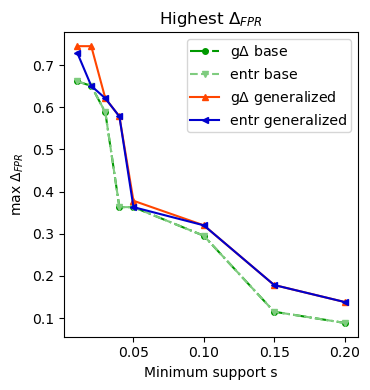

In [12]:
from utils_plot import plotDicts
info_i = "max"
type_criterion = "divergence_criterion"
gen_type = "with_gen"
from utils_plot import plotDicts



info_plot = {}
for type_gen in type_gens:
    for type_criterion in type_criterions:
        info_plot.update({abbreviateValue(f"{type_criterion}_{abbreviations[type_gen]}", abbreviations) \
            :  info_tree[type_criterion][info_i][type_gen] })

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_all_n.pdf")


size_fig = (3.8,4)

plotDicts(info_plot, marker=True, \
           sizeFig=size_fig, title="Highest $\Delta_{FPR}$", #yscale="log", 
          linestyle=lines_style, color_labels=color_labels,
          xlabel="Minimum support s",  ylabel="max $\Delta_{FPR}$", labelSize=10.2,
          outside=False,  saveFig=True, nameFig = figure_name)

Only divergence

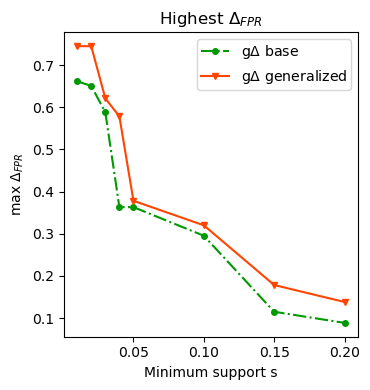

In [13]:
from utils_plot import plotDicts
info_i = "max"
type_criterion = "divergence_criterion"
gen_type = "with_gen"
from utils_plot import plotDicts


info_plot = {}
for type_gen in type_gens:
    for type_criterion in ["divergence_criterion"]:
        info_plot.update({abbreviateValue(f"{type_criterion}_{abbreviations[type_gen]}", abbreviations) \
            :  info_tree[type_criterion][info_i][type_gen] })

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_div_cr.pdf")

size_fig = (3.8,4)

plotDicts(info_plot, marker=True, \
           sizeFig=size_fig, title="Highest $\Delta_{FPR}$", #yscale="log", 
          linestyle=lines_style, color_labels=color_labels,
          xlabel="Minimum support s",  ylabel="max $\Delta_{FPR}$", labelSize=10.2,
          outside=False,  saveFig=True, nameFig = figure_name)

## Comparison entropy criterion

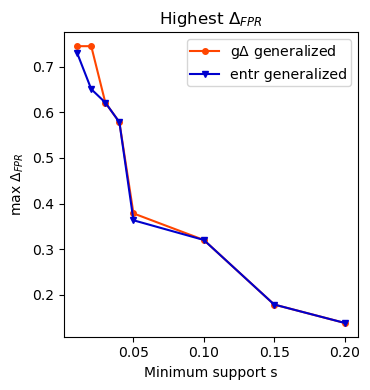

In [14]:
from utils_plot import plotDicts
info_i = "max"
type_criterion = "divergence_criterion"
gen_type = "with_gen"
from utils_plot import plotDicts


info_plot = {}
for type_gen in ["with_gen"]:
    for type_criterion in type_criterions:
        info_plot.update({abbreviateValue(f"{type_criterion}_{abbreviations[type_gen]}", abbreviations) \
            :  info_tree[type_criterion][info_i][type_gen] })

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_div_cr.pdf")

size_fig = (3.8,4)

plotDicts(info_plot, marker=True, \
           sizeFig=size_fig, title="Highest $\Delta_{FPR}$", #yscale="log", 
          linestyle=lines_style, color_labels=color_labels,
          xlabel="Minimum support s",  ylabel="max $\Delta_{FPR}$", labelSize=10.2,
          outside=False,  saveFig=True, nameFig = figure_name)

#  Plot FP 

## All

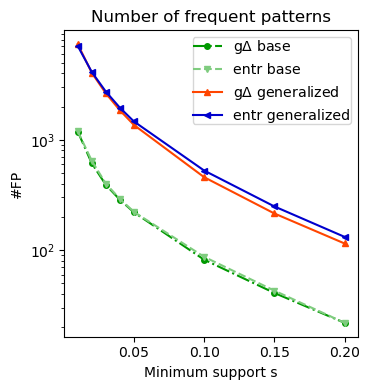

In [15]:
from utils_plot import plotDicts
info_i = "FP"


info_plot = {}
for type_gen in type_gens:
    for type_criterion in type_criterions:
        info_plot.update({abbreviateValue(f"{type_criterion}_{abbreviations[type_gen]}", abbreviations) \
            :  info_tree[type_criterion][info_i][type_gen] })

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_all_n.pdf")


size_fig = (3.8,4)

plotDicts(info_plot,  marker=True, \
          linestyle=lines_style, title="Number of frequent patterns",
          xlabel="Minimum support s",  ylabel="#FP",
          yscale="log", sizeFig=size_fig, labelSize=10.2,
          outside=False, color_labels=color_labels, borderpad=0.05, saveFig=True, nameFig = figure_name)

## Only divergence-based criterion

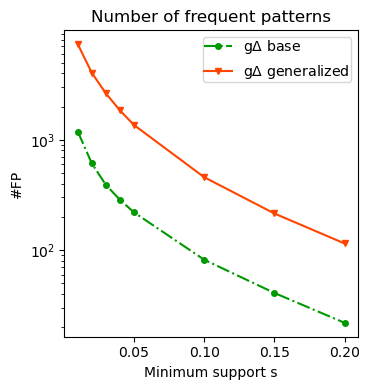

In [16]:
from utils_plot import plotDicts
info_i = "FP"


info_plot = {}
for type_gen in type_gens:
    for type_criterion in ["divergence_criterion"]:
        info_plot.update({abbreviateValue(f"{type_criterion}_{abbreviations[type_gen]}", abbreviations) \
            :  info_tree[type_criterion][info_i][type_gen] })

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_div_cr.pdf")

plotDicts(info_plot,  marker=True, \
          linestyle=lines_style, title="Number of frequent patterns",
          xlabel="Minimum support s",  ylabel="#FP",
          yscale="log", sizeFig=size_fig, labelSize=10.2,
          outside=False, color_labels=color_labels, borderpad=0.05, saveFig=True, nameFig = figure_name)

In [34]:
import os

time_div = {type_criterion:{} for type_criterion in type_criterions}

info_ex_discr = {}

for info_i in ["time"]:

    for type_criterion in type_criterions:
        if info_i not in info_tree[type_criterion]:
            info_tree[type_criterion][info_i] = {}
        filename = os.path.join(output_results,dataset_name ,type_criterion,f"stree_{min_sup_tree}", metric, f"info_{info_i}.json")

        stat = load_json(filename)

        for gen_type in type_gens:
            time_div[type_criterion][gen_type] =  {float(k):v for k,v in stat[gen_type].items()}    

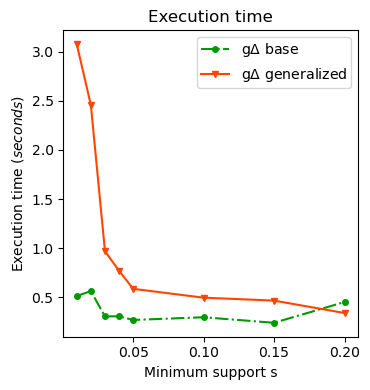

In [38]:
from utils_plot import plotDicts

type_criterion = "divergence_criterion"
gen_type = "with_gen"
from utils_plot import plotDicts



info_plot = {}
for type_gen in type_gens:
        info_plot.update({abbreviateValue(f"{type_criterion}_{abbreviations[type_gen]}", abbreviations) \
            :  time_div[type_criterion][type_gen] })

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_time.pdf")


size_fig = (3.8,4)
fig = plotDicts(info_plot, marker=True, \
           sizeFig=size_fig, title="Execution time", #yscale="log", 
          linestyle=lines_style, color_labels=color_labels,
          xlabel="Minimum support s",  ylabel="Execution time $(seconds)$", labelSize=10.2,
          outside=False,  saveFig=True, nameFig = figure_name)

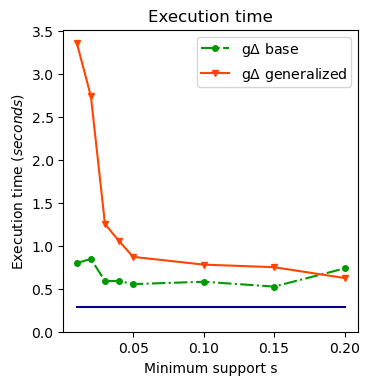

In [52]:
from utils_plot import MARKERS

import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"] = sizeFig, 100
size_fig = (3.8,4)
fig, ax = plt.subplots(figsize=size_fig, dpi=100)

tree_discr_time = stat["tree_time"]

info_plot2 = {k: {ki:vi+tree_discr_time for ki, vi in info_plot[k].items()} for k in info_plot }
m_i = 0
info_dicts = info_plot2
colors = [color_labels[label] for label in info_dicts]

keys = list(info_dicts.keys())
markersize=4
linewidth = 1.5
for e, (label_name, info_dict) in enumerate(info_dicts.items()):
    # label_name = (
    #     label if label != "artificial_10" else "artificial"
    # )  # For clarity reasons

    ax.plot(
        list(info_dict.keys()),
        list(info_dict.values()),
        label=label_name,
        marker=MARKERS[m_i],
        linewidth=linewidth,
        markersize=markersize,
        color=colors[e],
        linestyle=lines_style[label_name],
    )
    m_i = m_i + 1
plt.plot(list(info_dict.keys()), [tree_discr_time]*len(list(info_dict.keys())), c="darkblue")

import cycler
linestyle=lines_style
xlabel="Minimum support s"
ylabel="Execution time $(seconds)$"
labelSize=10.2
title="Execution time"

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.ylim(bottom=0)
plt.legend(
        prop={"size": labelSize},
        fontsize=5,
        borderpad=0.25,
    )
saveFig = False

if saveFig:
    fig.tight_layout()
    plt.savefig(nameFig, bbox_inches="tight")


In [45]:
info_plot

{'g$\\Delta$ base': {0.01: 0.5126140117645264,
  0.02: 0.5613818168640137,
  0.03: 0.30356597900390625,
  0.04: 0.3056161403656006,
  0.05: 0.26784205436706543,
  0.1: 0.29544711112976074,
  0.15: 0.23900103569030762,
  0.2: 0.4501347541809082},
 'g$\\Delta$ generalized': {0.01: 3.076456069946289,
  0.02: 2.4566128253936768,
  0.03: 0.9681870937347412,
  0.04: 0.7687301635742188,
  0.05: 0.5851728916168213,
  0.1: 0.4948253631591797,
  0.15: 0.46503615379333496,
  0.2: 0.33874082565307617}}